In [1]:
from google.colab import files


uploaded = files.upload()


Saving covid_impact_on_work new.csv to covid_impact_on_work new.csv


k-Nearest Neighbors Classification Accuracy: 1.0
Decision Tree Classification Accuracy: 1.0
Linear Regression Mean Squared Error: 0.25048830583160914
k-Means Cluster Centers: [[ 0.00000000e+00 -1.44741736e+00 -6.07552803e-03 -6.10925127e-02
  -2.98390415e-02  7.10989998e-03 -1.80949179e-02 -2.52985213e-02
  -1.07212163e-02 -9.39860174e-03 -2.02277304e-02  2.02205934e-02
   0.00000000e+00]
 [ 0.00000000e+00  6.90885729e-01  1.85231561e-02 -2.00994117e-01
  -3.46730712e-01  1.26513326e-02 -3.34706946e-01 -3.25601265e-01
   4.94158349e-03 -3.65374253e-04  1.20942410e-02 -3.47902939e-02
   0.00000000e+00]
 [ 0.00000000e+00  6.32337994e-01 -2.53678633e-02  4.39501386e-01
   6.60487054e-01 -3.18849294e-02  6.23735638e-01  6.16717808e-01
   4.99931280e-03  1.28078478e-02  4.46216402e-03  3.62552687e-02
   0.00000000e+00]]
PCA Components:
 [[ 0.         -0.08146688  0.12050128  0.2923405   0.03944351 -0.09920233
   0.35253715  0.53862907 -0.28358127  0.36645385  0.10071593  0.49267489
   0.   

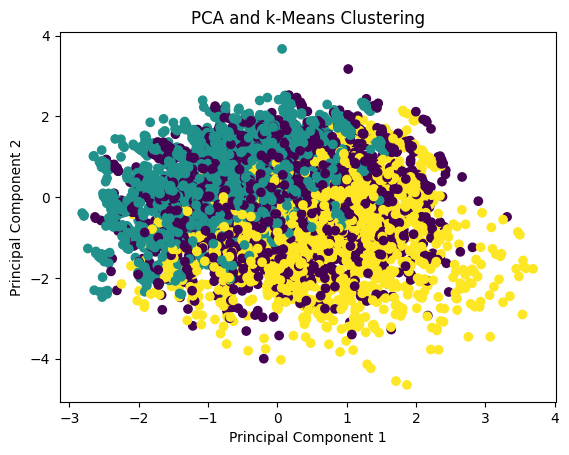

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, mean_squared_error
import warnings

warnings.filterwarnings("ignore")

# Load data (replace 'your_data.csv' with your file)
data = pd.read_csv('covid_impact_on_work new.csv')

# Convert large strings to numbers
data = data.replace({'\.': ''}, regex=True).apply(pd.to_numeric, errors='coerce')

# Preprocessing
# Convert categorical columns to numeric codes
le = LabelEncoder()
for col in ['Sector', 'Stress_Level', 'Affected_by_Covid']:
    data[col] = le.fit_transform(data[col].astype(str))

# Fill any missing values
data.fillna(data.mean(), inplace=True)

# Split into features (X) and target (y) for different tasks
X = data.drop(columns=['Stress_Level', 'Productivity_Change'])
y_classification = data['Stress_Level']
y_regression = data['Productivity_Change']

# Standardize features for kNN and KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data for classification and regression tasks
X_train, X_test, y_train_class, y_test_class = train_test_split(X_scaled, y_classification, test_size=0.3, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.3, random_state=42)

# 1. k-Nearest Neighbors Classification
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train_class)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test_class, y_pred_knn)
print("k-Nearest Neighbors Classification Accuracy:", accuracy_knn)

# 2. Decision Tree Classification
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train_class)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test_class, y_pred_dt)
print("Decision Tree Classification Accuracy:", accuracy_dt)

# 3. Linear Regression for Productivity Change Prediction
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
y_pred_lr = lr.predict(X_test_reg)
mse_lr = mean_squared_error(y_test_reg, y_pred_lr)
print("Linear Regression Mean Squared Error:", mse_lr)

# 4. k-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
print("k-Means Cluster Centers:", kmeans.cluster_centers_)

# 5. Principal Component Analysis (PCA) for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("PCA Components:\n", pca.components_)

# Plot PCA (Optional)
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and k-Means Clustering')
plt.show()


In [3]:
# Function to preprocess new data for prediction
def preprocess_new_data(new_data):
    # Convert strings to numbers if necessary
    new_data = new_data.replace({'\.': ''}, regex=True).apply(pd.to_numeric, errors='coerce')
    new_data.fillna(data.mean(), inplace=True)  # Fill missing values with mean
    new_data_scaled = scaler.transform(new_data)  # Standardize the data
    return new_data_scaled

# Function to make predictions with all models
def make_predictions(new_data):
    # Preprocess new data
    new_data_scaled = preprocess_new_data(new_data)

    # 1. Predict Stress_Level (Classification) using kNN
    knn_prediction = knn.predict(new_data_scaled)

    # 2. Predict Stress_Level (Classification) using Decision Tree
    dt_prediction = dt.predict(new_data_scaled)

    # 3. Predict Productivity_Change (Regression) using Linear Regression
    lr_prediction = lr.predict(new_data)

    # 4. Predict Cluster Label using k-Means
    kmeans_prediction = kmeans.predict(new_data_scaled)

    # Combine results
    results = {
        'kNN_Stress_Level': knn_prediction,
        'DecisionTree_Stress_Level': dt_prediction,
        'LinearRegression_Productivity_Change': lr_prediction,
        'kMeans_Cluster': kmeans_prediction
    }
    return results

# Example usage with new data
# Replace `new_data_sample` with your new data in DataFrame format
new_data_sample = pd.DataFrame({
    'Sector': [0],  # Example encoded value
    'Increased_Work_Hours': [1],
    'Work_From_Home': [1],
    'Hours_Worked_Per_Day': [8.5],
    'Meetings_Per_Day': [5.2],
    'Health_Issue': [0],
    'Job_Security': [1],
    'Childcare_Responsibilities': [0],
    'Commuting_Changes': [1],
    'Technology_Adaptation': [1],
    'Salary_Changes': [0],
    'Team_Collaboration_Challenges': [1],
    'Affected_by_Covid': [1]
})
# Make predictions
predictions = make_predictions(new_data_sample)
print(predictions)


{'kNN_Stress_Level': array([0]), 'DecisionTree_Stress_Level': array([0]), 'LinearRegression_Productivity_Change': array([0.51326203]), 'kMeans_Cluster': array([1], dtype=int32)}
